In [10]:
#matplotlib inline command
%matplotlib inline

#importing dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
#files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

#reading files
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [12]:
#merging data files
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.rename(columns={"city": "City", "date": "Date","fare": "Fare", "ride_id": "Ride Id","driver_count": "No. Drivers", "type": "City Type"}, inplace=True)

#setting date to datetime64
pyber_data_df["Date"] = pd.to_datetime(pyber_data_df["Date"])


In [13]:
#getting total fare and fares by city type
fares_by_type = pyber_data_df.groupby(["City Type"]).sum()["Fare"]
total_fares = pyber_data_df["Fare"].sum()

#getting total rides and rides by city
rides_by_city = pyber_data_df.groupby(["City Type"]).count()["Ride Id"]
total_rides = pyber_data_df["Ride Id"].count()

#getting total drivers and drivers by city
drivers_by_city = pyber_data_df.groupby(["City Type"]).sum()["No. Drivers"]
total_drivers = pyber_data_df["No. Drivers"].sum()



In [14]:
#Pyber Challenge Part 1
#create fares per driver variable
fare_per_driver = fares_by_type/drivers_by_city

#create fares per ride variable
fare_per_ride = fares_by_type/rides_by_city

pyber_summary_df = pd.DataFrame({"Total Rides": rides_by_city,
                                "Total Drivers": drivers_by_city,
                                "Total Fares": fares_by_type,
                                "Average Fare per Ride": fare_per_ride,
                                "Average Fare per Driver": fare_per_driver
                                })
#format table
pyber_summary_df.index.name = ""
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
,,,,,
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


In [15]:
#Pyber Challenge Part 2
#set index to date
pyber_data_df.set_index("Date", inplace=True)

pyber_data_df

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2018-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2018-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2018-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2018-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2018-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2018-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2018-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2018-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [16]:
#copy pyber to find fares by date
copy_pyber_df = pyber_data_df.loc[:, ("Date", "City Type", "Fare")].copy()
copy_pyber_df.drop("Date", axis=1, inplace=True)

#sort by city type
fares_by_date = copy_pyber_df.groupby(["City Type", "Date"]).sum()["Fare"]

#new data frame
fares_by_date_df = pd.DataFrame({"Total Fares by Date":fares_by_date})


In [17]:
#reset index
pyber_data_df = pyber_data_df.reset_index()

#creating pivot table for fares by date data
fares_by_date_pivot_table = pd.pivot_table(pyber_data_df, index=["Date"], columns=["City Type"])

fares_by_date_pivot_table

Fare                 No. Drivers                Ride Id  \
City Type           Rural Suburban  Urban       Rural Suburban Urban   Rural   
Date                                                                           
2018-01-01 00:08:16   NaN      NaN  37.91         NaN      NaN  69.0     NaN   
2018-01-01 00:46:46   NaN    47.74    NaN         NaN     23.0   NaN     NaN   
2018-01-01 02:07:24   NaN    24.07    NaN         NaN     10.0   NaN     NaN   
2018-01-01 03:46:50   NaN      NaN   7.57         NaN      NaN  64.0     NaN   
2018-01-01 05:23:21   NaN      NaN  10.75         NaN      NaN  28.0     NaN   
...                   ...      ...    ...         ...      ...   ...     ...   
2018-05-08 04:20:00   NaN      NaN  21.99         NaN      NaN  52.0     NaN   
2018-05-08 04:39:49   NaN      NaN  18.45         NaN      NaN  11.0     NaN   
2018-05-08 07:29:01   NaN      NaN  18.55         NaN      NaN  33.0     NaN   
2018-05-08 11:38:35   NaN      NaN  19.77         NaN      NaN   4.0     NaN   
2018-05-08 13:10:18   NaN      NaN  18.04         NaN      NaN  58.0     NaN   

                                                 
City Type                Suburban         Urban  
Date                                             
2018-01-01 00:08:16           NaN  5.673667e+12  
2018-01-01 00:46:46  2.215913e+12           NaN  
2018-01-01 02:07:24  7.827432e+12           NaN  
2018-01-01 03:46:50           NaN  5.815378e+12  
2018-01-01 05:23:21           NaN  6.571513e+12  
...                           ...           ...  
2018-05-08 04:20:00           NaN  1.179977e+11  
2018-05-08 04:39:49           NaN  1.811575e+12  
2018-05-08 07:29:01           NaN  5.682021e+12  
2018-05-08 11:38:35           NaN  7.837163e+12  
2018-05-08 13:10:18           NaN  5.616263e+12  

[2375 rows x 9 columns]

In [19]:
#data frame from 1-01-2018 to 4-28-2018 by week
jan_apr = fares_by_date_pivot_table.loc['2018-01-01':'2018-04-28']
jan_apr_weekly = jan_apr.resample('W').sum()
#adding date as a column for plotting purposes
urban_fare_by_date = jan_apr_weekly["Fare"].reset_index()
urban_fare_by_date

City Type,Date,Rural,Suburban,Urban
0,2018-01-07,187.92,876.61,1879.70
1,2018-01-14,139.80,1080.40,2193.36
2,2018-01-21,233.85,1163.93,2105.90
3,2018-01-28,210.94,1285.13,1846.98
4,2018-02-04,361.50,1079.58,2085.77
5,2018-02-11,81.91,879.92,2200.85
6,2018-02-18,140.52,1394.86,2389.68
7,2018-02-25,448.07,1067.99,2156.88
8,2018-03-04,75.65,836.61,2619.82
9,2018-03-11,353.76,842.28,2240.19


Text(0, 0.5, 'Fare ($USD)')

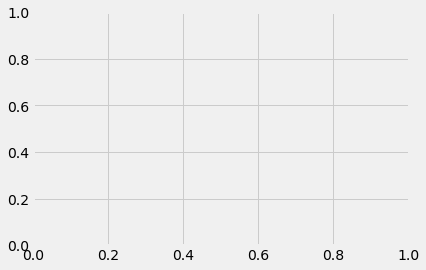

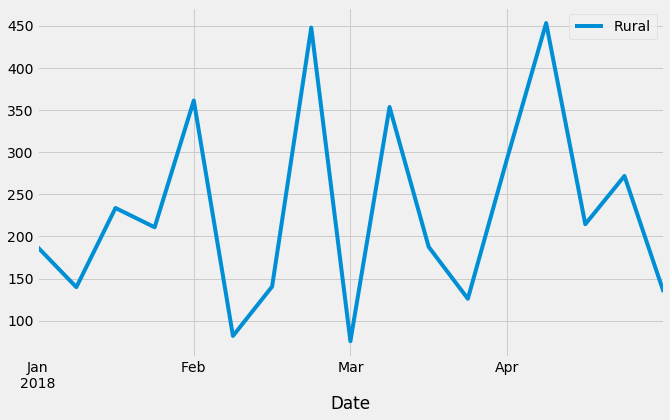

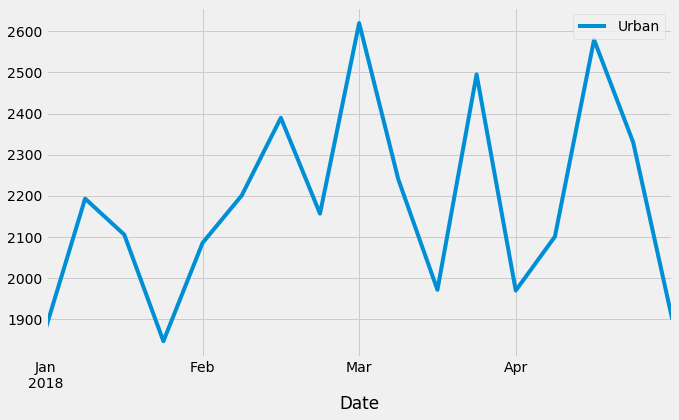

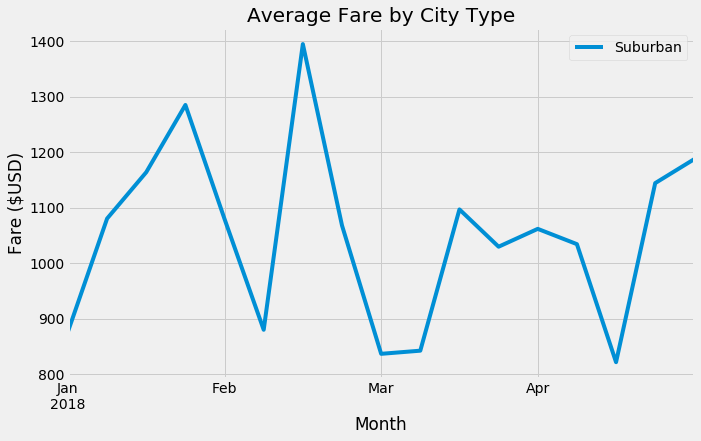

In [33]:
#import matplotlib styles and numpy
import matplotlib.style as style
import numpy as np

#format axis
style.use('fivethirtyeight')

#create line plots
fig, ax = plt.subplots()
ax = urban_fare_by_date.plot(kind='line',x="Date", y="Rural", label="Rural", figsize=(10,6))

ax = urban_fare_by_date.plot(kind='line',x="Date", y="Urban", label="Urban", figsize=(10,6))

ax = urban_fare_by_date.plot(kind='line',x="Date", y="Suburban", label="Suburban", figsize=(10,6))

ax = plt.gca()

plt.title("Average Fare by City Type")
plt.xlabel("Month")
plt.ylabel("Fare ($USD)")